<a href="https://colab.research.google.com/github/YirenShen-07/Assignment4/blob/main/%22Assignment4_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #4
### The dataset I chose is a heart attack likelihood dataset containing the health status and test results of a number of patients with the ultimate goal of predicting whether they have a heart attack or not (represented by the target column). To predict the likelihood of a heart attack, I used three methods from the imodels library: the RuleFit rule set, Greedy tree sums (FIGS), and the Greedy rule tree (CART)
### Yiren Shen


## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [64]:

# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: cannot remove './sample_data': No such file or directory


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Errno 2] No such file or directory: 'Duke-Yiren-AI-XAI/templates'
/content
drive/  Duke-AI-XAI/  greedy_tree  greedy_tree.pdf


**Using environment variables in Google Colab**

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [65]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Overview**

1) age

2) sex

3) chest pain type(4 values:0--No chest pain/1--Typical angina/2--Atypical angina/3--Non-anginal pain)

4) trestbps: resting blood pressure

5) chol: serum cholestoral in mg/dl

6) fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

7) restecg: resting electrocardiographic results (values 0,1,2)

8) thalach: maximum heart rate achieved

9) exang: exercise induced angina

10) oldpeak: ST depression induced by exercise relative to rest

11) slope: the slop of the peak exercise ST segment

12) ca: number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) **target**: The target variable, 0= less chance of heart attack 1= more chance of heart attack

In [67]:
data="/content/drive/MyDrive/heart.csv"
df=pd.read_csv(data)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
pip install imodels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Rulefit rule set

I chose RuleFit because it combines a linear model with a decision tree-generated rule set that captures complex nonlinear interactions while being interpretable. This is very relevant to my dataset on the difficulty of predicting heart disease. This is because it is critical to understand not only the predictions, but also the features that have the greatest impact on the predictions.

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import check_classification_targets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

from imodels import RuleFitClassifier
from imodels.rule_set.rule_set import RuleSet
from imodels.util.arguments import check_fit_arguments
from imodels.util.extract import extract_rulefit
from imodels.util.rule import get_feature_dict, replace_feature_name, Rule
from imodels.util.score import score_linear
from imodels.util.transforms import Winsorizer, FriedScale
from imodels.util.tree import compute_tree_complexity


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Forms a rule-set based classifier that combines linear modeling and rule-set interpretability to provide interpretable machine learning models. The model performs linear regression scoring by extracting rules from the decision tree and can output the relative importance of each rule and each feature.

In [70]:
# initialization function
class CustomRuleFitClassifier(BaseEstimator, ClassifierMixin, RuleSet):
    def __init__(self, n_estimators=100, tree_size=4,
                 max_rules=30, memory_par=0.01, lin_trim_quantile=0.025,
                 lin_standardise=True, exp_rand_tree_size=True, include_linear=True,
                 random_state=None, cv=True):
        self.n_estimators = n_estimators
        self.tree_size = tree_size
        self.max_rules = max_rules
        self.memory_par = memory_par
        self.lin_trim_quantile = lin_trim_quantile
        self.lin_standardise = lin_standardise
        self.exp_rand_tree_size = exp_rand_tree_size
        self.include_linear = include_linear
        self.random_state = random_state
        self.cv = cv
        self.winsorizer = Winsorizer(trim_quantile=self.lin_trim_quantile)
        self.friedscale = FriedScale(self.winsorizer)

    def fit(self, X, y):
        '''Fit the RuleFit model to the data'''
        # Check and prepare the data
        X, y, feature_names = check_fit_arguments(self, X, y, feature_names=None)
        self.n_features_in_ = X.shape[1]
        self.feature_names_ = get_feature_dict(X.shape[1], feature_names)

        # Extract rules
        self.rules_ = extract_rulefit(
            X, y,
            feature_names=list(self.feature_names_.values()),  # deliver feature_names parameters
            n_estimators=self.n_estimators,
            tree_size=self.tree_size,
            exp_rand_tree_size=self.exp_rand_tree_size,
            random_state=self.random_state
        )

        # Score rules using L1-regularized linear model
        self.rules_, self.coef_, self.intercept_ = self._score_rules(X, y, self.rules_)
        self.complexity_ = self._get_complexity()

        return self

    def _score_rules(self, X, y, rules):
        '''Score the extracted rules'''
        X_concat = np.zeros([X.shape[0], 0])

        # Process linear variables if include_linear is True
        if self.include_linear:
            X_regn = self._standardize(X)
            X_concat = np.concatenate((X_concat, X_regn), axis=1)

        # Generate binary matrix for rules
        X_rules = self._apply_rules(X, rules)
        if X_rules.shape[1] > 0:
            X_concat = np.concatenate((X_concat, X_rules), axis=1)

        if X_concat.shape[1] == 0:
            return [], [], 0

        # L1-regularized linear model (Lasso)
        return score_linear(X_concat, y, rules, max_rules=self.max_rules, cv=self.cv)

    def _standardize(self, X):
        '''Standardize linear variables'''
        self.winsorizer.train(X)
        X_winsorized = self.winsorizer.trim(X)
        if self.lin_standardise:
            self.friedscale.train(X_winsorized)
            return self.friedscale.scale(X_winsorized)
        return X_winsorized

    def _apply_rules(self, X, rules):
        '''Apply rules and generate a binary matrix'''
        X_rules = np.zeros((X.shape[0], len(rules)))
        for i, rule in enumerate(rules):
            # Apply each rule as a logical condition
            rule_str = str(rule)  # Convert rule to string
            rule_condition = self._parse_rule(rule_str, X)
            X_rules[:, i] = np.where(rule_condition, 1, 0)
        return X_rules

    def _parse_rule(self, rule_str, X):
        '''Parse the rule string and apply it to X'''
        # Example: "X1 <= 2.5 and X2 > 1.5" -> convert it to logical expression
        rule_str = rule_str.replace("X", "X[:,")
        rule_str = rule_str.replace("and", "&").replace("or", "|")  # Handle 'and', 'or'

        # Ensure proper column reference handling for NumPy array
        rule_str = rule_str.replace("<=", " <= ").replace(">=", " >= ")
        rule_str = rule_str.replace(">", " > ").replace("<", " < ")

        return eval(rule_str)

    def predict(self, X):
        '''Predict labels for the input data'''
        check_is_fitted(self)
        return np.sign(self._predict_continuous(X))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The RuleFitClassifier model was used to train and test the heart attack dataset and its performance was evaluated by the predictive power of the model.

In [71]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# initialize the model
rulefit = RuleFitClassifier(
    n_estimators=100,
    tree_size=4,
    sample_fract='default',
    max_rules=30,
    memory_par=0.01,
    lin_standardise=True,
    lin_trim_quantile=0.025,
    exp_rand_tree_size=True,
    include_linear=True,
    cv=True,
    random_state=42
)
# training model
rulefit.fit(X_train_scaled, y_train)

# Prediction using models
y_pred_rulefit = rulefit.predict(X_test_scaled)

# Calculate accuracy
rulefit_accuracy = accuracy_score(y_test, y_pred_rulefit)
print(f"RuleFitClassifier accuracy: {rulefit_accuracy}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFitClassifier accuracy: 0.8241758241758241


In [73]:
# show classification report
print(classification_report(y_test, y_pred_rulefit))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.89      0.78      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This classification report for the RuleFitClassifier model shows how well the model performs on the Heart Disease dataset.
*   The overall accuracy is 82%, indicating that the model can correctly predict the majority of samples on the test set.
*   The model performs well in predicting heart disease (category 1) with a precision of 89%, but the recall is relatively low (78%), indicating that some patients with heart disease were not correctly identified.


In [74]:
# visualize it
rulefit.visualize(decimals=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef
1,X1,-0.35
2,X2,0.04
5,X5,0.24
8,X8,-0.53
27,X12 <= 0.29433 and X9 <= 1.22657,0.06
30,X11 <= -0.14918 and X9 <= 1.27248,0.28
28,X11 <= -0.14918 and X9 <= 1.31839,0.30
33,X11 <= 0.90504 and X12 <= 0.29433,0.36
23,X10 <= 0.13868,-0.20
29,X2 > -0.49692 and X9 <= 0.85929,0.41


*   Positive coefficients such as sex(X2) > -0.49692 and exang (X9) <= 0.85929 correspond to a coefficient of 0.41 indicating that these rules help to predict the likelihood of heart disease.
*   Negative coefficients such as ca(X12) > 0.29433 and exang(X9) > -0.42618 corresponding to a coefficient of -1.0 indicate that these rules are associated with a lower incidence of heart disease.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 500x500 with 0 Axes>

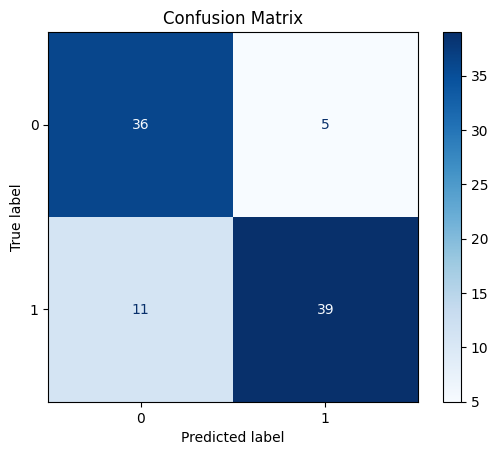

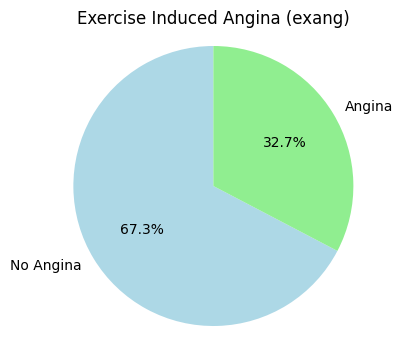

<Figure size 400x400 with 0 Axes>

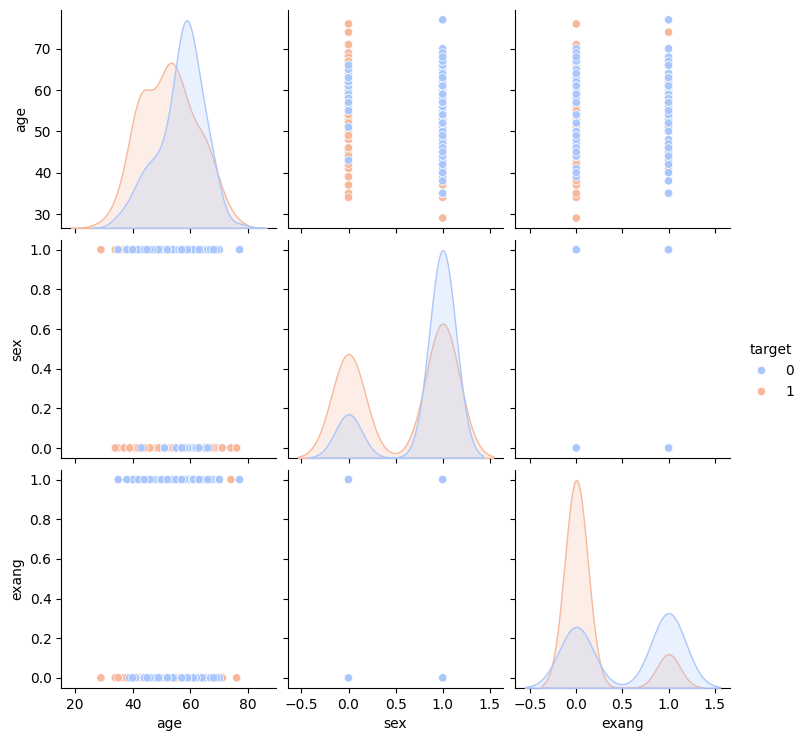

In [75]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rulefit)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

# Pie chart for 'exang' feature with smaller figure size
exang_counts = df['exang'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(exang_counts, labels=['No Angina', 'Angina'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Exercise Induced Angina (exang)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pair plot for some features with smaller figure size
plt.figure(figsize=(4, 4))  #
sns.pairplot(df[['age', 'sex', 'exang', 'target']], hue='target', palette='coolwarm')
plt.show()





*   According to the Confusion matrix, my model is performing fairly well, as the majority of predictions are in the correct categories (36 TN and 39 TP).
*   The pie chart shows that 67.3% of individuals do not experience exercise-induced angina, while 32.7% do. The majority of the dataset is made up of people who do not have this condition during exercise.

*   This pair plot suggests that individuals with exercise-induced angina (exang = 1) are more likely to have heart disease (target = 1). Additionally, while age distributions are similar across both groups, males make up the majority of the dataset.






**Summary:**

The advantage of RuleFit is that it not only generates predictive models, but also interpretable rules. The overall accuracy is 82%, indicating that the model can correctly predict the majority of samples on the test set. We can clearly see which features have the greatest impact on the results. For example, the rules for sex and exang (exercise induced angina) appear in multiple combinations, indicating that they are important features. age also appears in multiple complex rules, indicating its importance to model decisions. These features (e.g., age, sex, exercise-induced angina, etc.) have different effects on heart disease prediction depending on the combination of rules, and the model-generated rules and coefficients help us to understand which combinations of features are most helpful in predicting outcomes.



# Greedy tree sums (FIGS)

FIGS generates fewer trees and makes decisions with the fewest combinations of features. This is particularly effective in predicting heart disease in my dataset, as I don't want the model to be overly complex, especially if some of the relationships between the variables are more straightforward. In addition, it handles interaction effects between variables well, such as the relationship between heart rate and exercise-induced angina.

In [76]:
# training and evaluation of a FIGSClassifier model
from imodels import FIGSClassifier
figs = FIGSClassifier()
figs.fit(X_train_scaled, y_train)
y_pred_figs = figs.predict(X_test_scaled)
print('FIGSClassifier Accuracy:', accuracy_score(y_test, y_pred_figs))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FIGSClassifier Accuracy: 0.7912087912087912


In [77]:
# classification report
print(classification_report(y_test, y_pred_figs))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



*   Overall accuracy of 79%, indicating that the model is able to predict heart disease with or without heart disease relatively well.

*   The model's performance in predicting having heart disease (category 1) and not having heart disease (category 0) is more balanced, with precision and recall close to 80%.


In [78]:
# Exporting rules from FIGSClassifier
for i, tree in enumerate(figs.trees_):
    print(f"Tree {i+1} Rules:")
    print(tree)
    print("-" * 50)

Tree 1 Rules:
X_11 <= -0.149 (Tree #0 root)
--------------------------------------------------
Tree 2 Rules:
X_12 <= 0.294 (Tree #1 root)
--------------------------------------------------
Tree 3 Rules:
X_2 <= -0.497 (Tree #2 root)
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




*   Each decision tree is partitioned based on different features: slope(X_11), ca(X_12), sex(X_2), and the rules at the root of the tree determine the main decision basis of the model.
*   A threshold for each feature (e.g., X_11 <= -0.149) is the key point used by the model to distinguish between different classes.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 400x400 with 0 Axes>

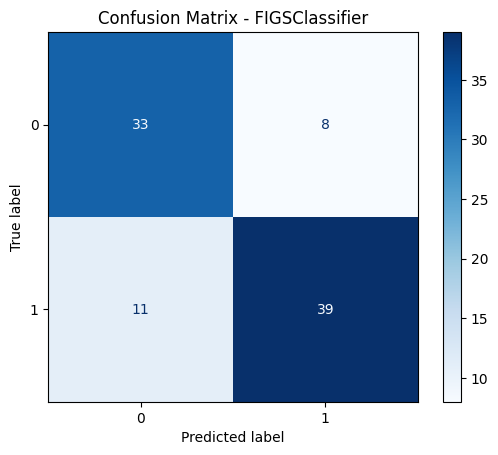

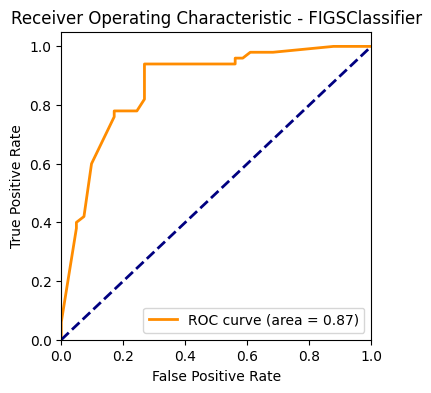

ROC AUC: 0.8685365853658537


In [79]:
# Confusion matrix for FIGSClassifier
conf_matrix_figs = confusion_matrix(y_test, y_pred_figs)

# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_figs)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - FIGSClassifier')

# Compute ROC curve and ROC area for FIGSClassifier
y_prob_figs = figs.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_figs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - FIGSClassifier')
plt.legend(loc='lower right')
plt.show()

# Compute ROC curve and ROC area for FIGSClassifier
y_prob_figs = figs.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_figs)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')



*   According to the confusion matrix, The model is able to correctly classify most of the positive and negative examples, as seen by the higher counts in the true positive (39) and true negative (33) cells.
*   The AUC of 0.87 suggests that the FIGSClassifier is performing well at distinguishing between the positive and negative classes, significantly better than random guessing.



**Summary:**

The model generated by FIGS consists of a set of simple decision trees, each with easy to understand rules. With these trees, the user can see how the model makes decisions based on specific features (e.g. sex, slope, ca, etc.).


# Greedy rule tree (CART)



*   CART generates a decision tree through a greedy strategy and the output is a tree model. The branches of the tree directly show how each decision was made, e.g., judgments based on blood pressure and age. This is of great practical value in the clinical assessment of cardiac risk, as physicians can clearly see the key risk factors affecting each patient.
*   The CART algorithm is well suited to binary problems, and since “target” in my dataset is a dichotomous variable (0 means no heart disease, 1 means heart disease), CART can be used very effectively to predict a patient's health status.



In [80]:
class GreedyTreeClassifier(DecisionTreeClassifier):
    """Wrapper around sklearn greedy tree classifier"""

    def fit(self, X, y, feature_names=None, sample_weight=None, check_input=True):
        # Check input arguments and set feature names properly
        X, y, feature_names = check_fit_arguments(self, X, y, feature_names)

        # Fit the tree using the parent class's method
        super().fit(X, y, sample_weight=sample_weight, check_input=check_input)

        # Calculate tree complexity (custom method)
        self._set_complexity()

    def _set_complexity(self):
        """Set the tree's complexity as the number of non-leaf nodes."""
        self.complexity_ = compute_tree_complexity(self.tree_)

    def __str__(self):
        s = '> ------------------------------\n'
        s += '> Greedy CART Tree:\n'
        s += '> \tPrediction is made by looking at the value in the appropriate leaf of the tree\n'
        s += '> ------------------------------\n'

        # Include feature names in the output if available
        if hasattr(self, 'feature_names') and self.feature_names is not None:
            return s + export_text(self, feature_names=self.feature_names, show_weights=True)
        else:
            return s + export_text(self, show_weights=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# Initialize the custom GreedyTreeClassifier
greedy_tree_model = GreedyTreeClassifier()

# Train (fit) the model on the training data
greedy_tree_model.fit(X_train, y_train, feature_names=X.columns)

# Predict on the test data
y_pred = greedy_tree_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy:.2f}")

# Print the structure of the decision tree
print(greedy_tree_model)


Model Accuracy: 0.71
> ------------------------------
> Greedy CART Tree:
> 	Prediction is made by looking at the value in the appropriate leaf of the tree
> ------------------------------
|--- feature_11 <= 0.50
|   |--- feature_12 <= 2.50
|   |   |--- feature_9 <= 1.70
|   |   |   |--- feature_3 <= 167.00
|   |   |   |   |--- feature_0 <= 60.50
|   |   |   |   |   |--- feature_3 <= 109.00
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1.0
|   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0.0
|   |   |   |   |   |--- feature_3 >  109.00
|   |   |   |   |   |   |--- weights: [0.00, 62.00] class: 1.0
|   |   |   |   |--- feature_0 >  60.50
|   |   |   |   |   |--- feature_9 <= 0.20
|   |   |   |   |   |   |--- feature_3 <= 132.50
|   |   |   |   |   |   |   |--- feature_4 <= 203.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0.0
|   |   |   |   |

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GreedyTreeClassifier was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


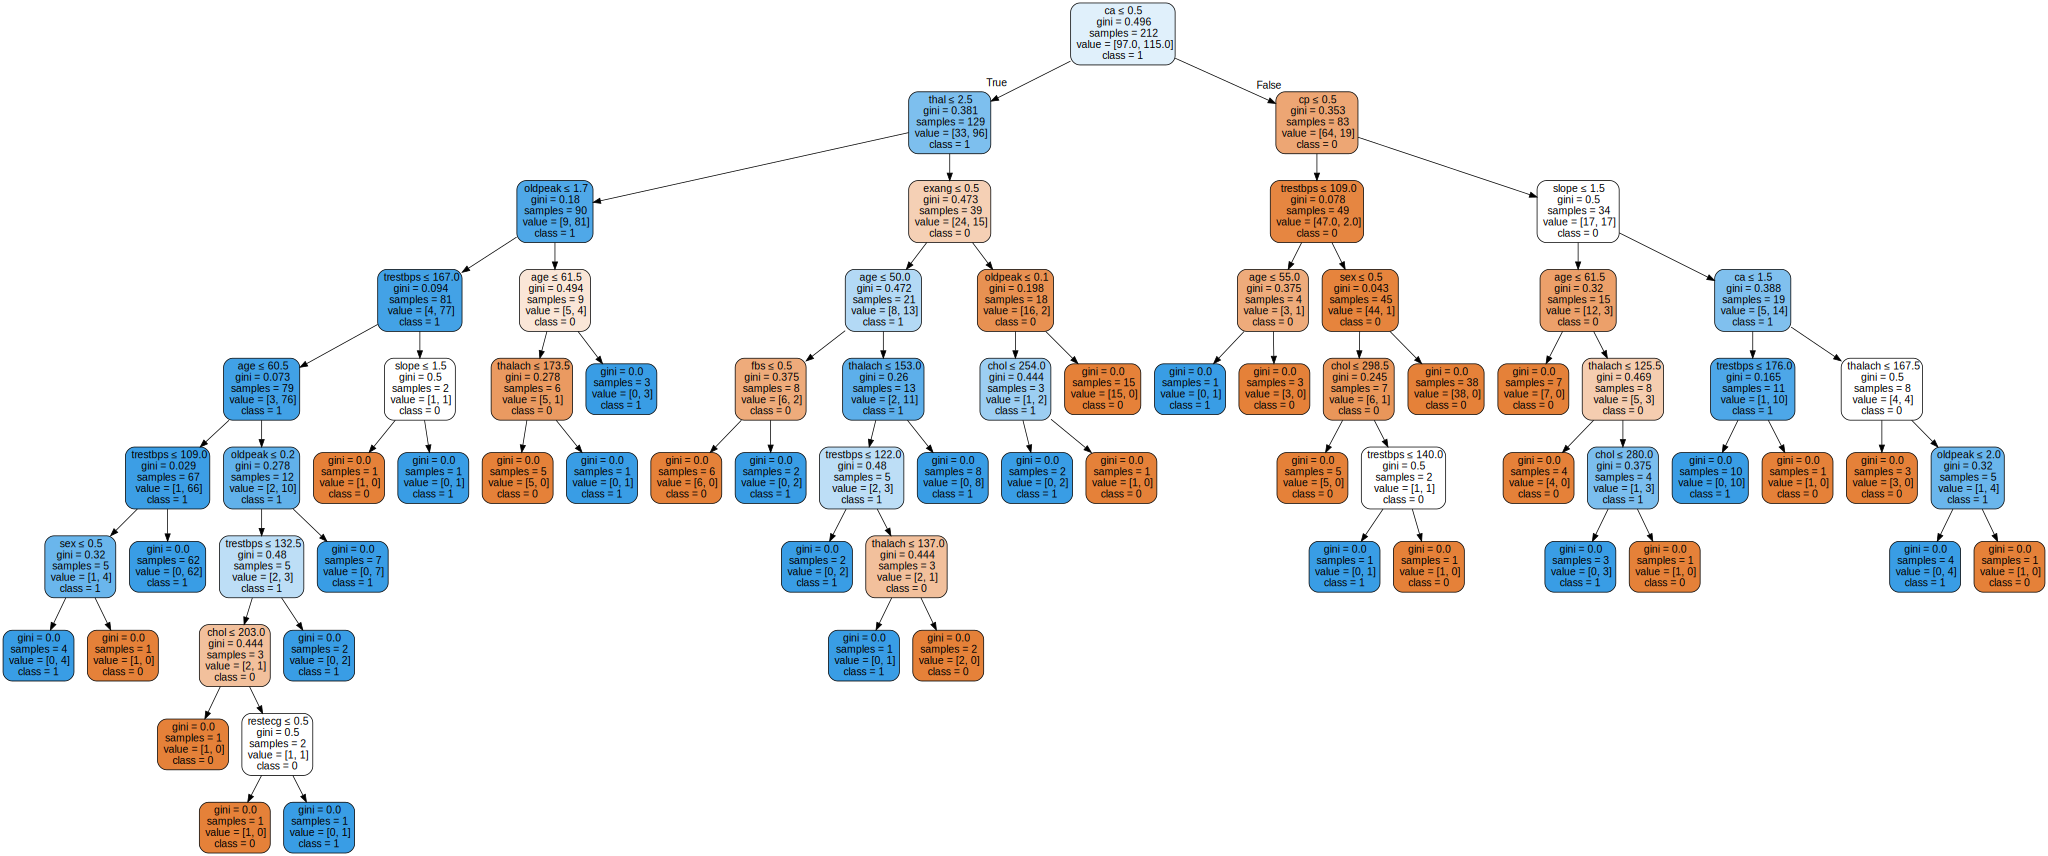

In [82]:
# Visualize the tree using graphviz
dot_data = export_graphviz(greedy_tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1'],  # Assuming binary classification
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("greedy_tree")
graph

**Summary：**
The Accuracy of the Greedy rule tree (CART) model is 71%.By analyzing the decision tree structure, it can be seen that the features feature_11(slope), feature_12(ca), feature_9(exang) and feature_3 (thalach) are used many times in the decision making process, which indicates that these features have a high impact on the model decision.

# Reference


1. Bhat, Naresha. “Health Care: Heart Attack Possibility.” Kaggle, 25 June 2020, www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility/data. Accessed 25 Sept. 2024.

2. “Index 🔍.” Chandan Singh, https://csinva.io/imodels/rule_set/rule_fit.html#imodels.rule_set.rule_fit.RuleFitClassifier Accessed 25 Sept. 2024.

3. “Index 🔍.” Chandan Singh, https://csinva.io/imodels/tree/figs.html#imodels.tree.figs.FIGSClassifier Accessed 25 Sept. 2024.

4. “Index 🔍.” Chandan Singh, https://csinva.io/imodels/tree/cart_wrapper.html#imodels.tree.cart_wrapper.GreedyTreeClassifier.set_score_request Accessed 25 Sept. 2024.

5. Chatgpt. Explanation of Python code for models